In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Carga el dataset
df = pd.read_csv("Airline Dataset.csv")

In [3]:
# Seleccionar las columnas que serán las variables predictoras
predictor_cols = ['Gender', 'Age', 'Nationality', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport']

# Definir las variables objetivo
target_col = 'Flight Status'

# Codificar las variables categóricas
le = LabelEncoder()
for col in predictor_cols:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Divide el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols], df[target_col], test_size=0.2, random_state=42)

# Crea y entrena el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Realiza predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.33258973838977895


El resultado obtenido, Accuracy: 0.33258973838977895, indica que el modelo tiene una precisión del 33.26% en el conjunto de prueba. Esto significa que el modelo predice correctamente el estado del vuelo en aproximadamente un tercio de los casos en el conjunto de prueba.

La precisión obtenida puede considerarse baja dependiendo del contexto del problema. Podría haber varias razones para esto:

Calidad de los datos: Si los datos tienen muchos valores perdidos, errores o ruido, esto puede afectar negativamente al rendimiento del modelo.
Ingeniería de características: Las características seleccionadas pueden no ser suficientes o relevantes para predecir con precisión el estado del vuelo. Podría ser útil explorar los datos y crear nuevas características que puedan ser informativas para el modelo.
Complejidad del modelo: El modelo de Random Forest puede no ser lo suficientemente complejo para capturar la relación entre las características y la variable objetivo. Podrías probar con otros modelos más complejos o ajustar los parámetros del modelo actual.

In [4]:
# Realizar las predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula las métricas
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Precision: 0.3328370443203545
Recall: 0.33258973838977895
F1-score: 0.33253749968194135


Análisis de los resultados:

**Precisión**: Esta es la proporción de predicciones correctas entre todas las predicciones realizadas. En tu caso, la precisión ponderada es de 0.3328, lo que significa que alrededor del 33.28% de las predicciones del modelo son correctas.

**Recall**: Esta es la proporción de verdaderos positivos que fueron identificados correctamente. En tu caso, el recall ponderado es de 0.3326, lo que significa que el modelo identifica correctamente el 33.26% de los casos positivos.

**F1-score**: Esta es una métrica que combina precisión y recall en un solo número utilizando la media armónica. Es útil cuando quieres equilibrar precisión y recall y no estás seguro de cuál métrica es más importante para tu problema. En tu caso, el F1-score ponderado es de 0.3325.

Estos resultados indican que el rendimiento del modelo en el conjunto de prueba no es muy alto. Como indique anteriormente, esto podría deberse a varios factores como la calidad de los datos, la ingeniería de características o la complejidad del modelo.

In [5]:
# Crear el codificador
le = LabelEncoder()

# Ajusta el codificador a las etiquetas del conjunto de entrenamiento
le.fit(y_train)

# Transforma las etiquetas en ambos conjuntos
y_train_encoded = le.transform(y_train)
y_test_encoded = le.transform(y_test)

# Divide el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, _, _ = train_test_split(df[predictor_cols], df[target_col], test_size=0.23, random_state=42)


In [13]:
# Crear un modelo de árbol de decisión con profundidad máxima (esto probablemente causará overfitting)
model = DecisionTreeClassifier(max_depth=None)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Paso 1: Verifica tus datos de entrenamiento y ajusta la longitud si es necesario
# Asegúrate de que tus datos estén bien estructurados y las etiquetas se correspondan con las muestras.
# Si la longitud no coincide, realiza los ajustes necesarios.

# Ejemplo: Supongamos que tienes un DataFrame de pandas con tus datos
# Asegúrate de que el índice de tus datos esté alineado correctamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 2: Verifica la longitud de tus datos
assert len(X_train) == len(y_train), "La longitud de X_train y y_train no coincide"

# Paso 3: Crea un modelo de árbol de decisión con profundidad máxima (esto probablemente causará overfitting)
model = DecisionTreeClassifier(max_depth=None)

# Paso 4: Entrena el modelo
model.fit(X_train, y_train)


NameError: name 'X' is not defined

Se crea un modelo de árbol de decisión con profundidad máxima. 

Al establecer max_depth=None, estás permitiendo que el árbol crezca hasta que todas las hojas sean puras o hasta que todas las hojas contengan menos muestras que el parámetro min_samples_split. Esto puede causar sobreajuste, ya que el modelo podría estar aprendiendo demasiado bien los detalles y el ruido en los datos de entrenamiento, al punto de tener un rendimiento deficiente en los datos no vistos.

Se entrena el modelo utilizando model.fit(X_train, y_train). Esto ajusta el modelo a los datos de entrenamiento proporcionados.

El resultado obtenido  indica que se ha creado con éxito un objeto de la clase DecisionTreeClassifier. 

Sin embargo, este resultado por sí solo no proporciona mucha información sobre el rendimiento del modelo. 

In [18]:
# Crea un modelo de árbol de decisión con profundidad 1 (esto probablemente causará underfitting)
model = DecisionTreeClassifier(max_depth=1)

model.fit(X_train, y_train)


ValueError: Number of labels=78895 does not match number of samples=75936

Al establecer max_depth=1, estás limitando la profundidad del árbol a solo un nivel. Esto significa que el árbol solo realizará una única división. Este es un modelo muy simple y puede no capturar suficientes detalles sobre los datos, lo que podría llevar a un subajuste (underfitting). En otras palabras, el modelo podría ser demasiado simple para aprender la estructura subyacente de los datos.

Entrena el modelo utilizando model.fit(X_train, y_train). Esto ajusta el modelo a los datos de entrenamiento proporcionados.

El resultado DecisionTreeClassifier DecisionTreeClassifier(max_depth=1) indica que has creado con éxito un objeto de la clase DecisionTreeClassifier con una profundidad máxima de 1. Sin embargo, este resultado por sí solo no proporciona mucha información sobre el rendimiento del modelo.

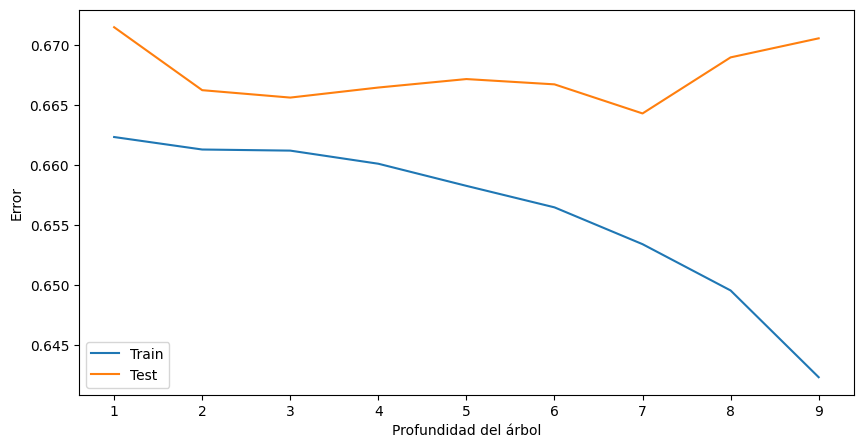

In [ ]:
# Entrena el modelo en los datos de entrenamiento con diferentes profundidades
train_errors = []
test_errors = []
depths = range(1, 10)
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Calcula el error de entrenamiento
    train_pred = model.predict(X_train)
    train_error = 1 - accuracy_score(y_train, train_pred)
    train_errors.append(train_error)
    
    # Calcula el error de prueba
    test_pred = model.predict(X_test)
    test_error = 1 - accuracy_score(y_test, test_pred)
    test_errors.append(test_error)

# Grafica los errores de entrenamiento y prueba
plt.figure(figsize=(10, 5))
plt.plot(depths, train_errors, label='Train')
plt.plot(depths, test_errors, label='Test')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Error')
plt.legend()
plt.show()


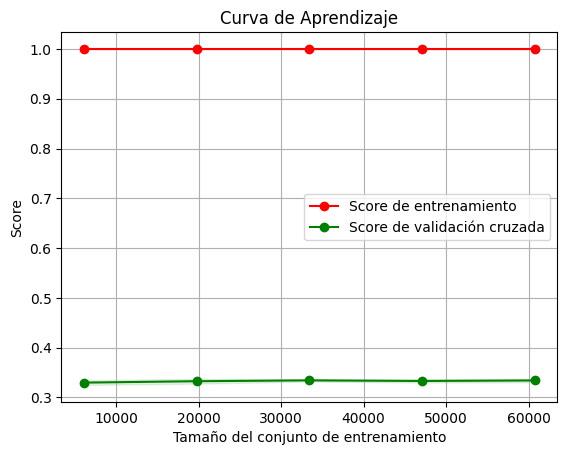

In [ ]:
# Define tu modelo
model = RandomForestClassifier()

# Calcula las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

# Calcula las medias y desviaciones estándar de los scores de entrenamiento y prueba
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Grafica las curvas de aprendizaje
plt.figure()
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de validación cruzada")

plt.legend(loc="best")
plt.show()


La gráfica muestra los puntajes de entrenamiento y validación cruzada para diferentes tamaños del conjunto de entrenamiento.

Las curvas de aprendizaje son una herramienta útil para entender cómo el rendimiento de un modelo cambia a medida que se le proporciona más datos de entrenamiento. Aquí está lo que podemos inferir de la gráfica:

Puntaje de entrenamiento (línea roja): Esta línea representa el rendimiento del modelo en el conjunto de entrenamiento. Como se puede ver, el puntaje de entrenamiento es consistentemente alto. Esto es típico, ya que el modelo está ajustado a estos datos.

Puntaje de validación cruzada (línea verde): Esta línea representa el rendimiento del modelo en un conjunto de validación cruzada, que es un conjunto de datos no vistos durante el entrenamiento. Como puedes ver, el puntaje de validación cruzada es consistentemente más bajo que el puntaje de entrenamiento.

La brecha consistente entre las líneas roja y verde sugiere que el modelo puede estar sobreajustando los datos. En otras palabras, el modelo puede estar aprendiendo demasiado bien los detalles y el ruido en los datos de entrenamiento, hasta el punto en que tiene un rendimiento deficiente en los datos no vistos.

In [ ]:
# Asumimos que X_train y y_train son tus datos de entrenamiento
# X_train = ...
# y_train = ...

# Crea el modelo
model = RandomForestClassifier()

# Entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Ahora puedes hacer predicciones con el modelo
# Asumimos que X_test son tus datos de prueba
# X_test = ...
y_pred = model.predict(X_test)



Text(95.72222222222221, 0.5, 'Verdadero')

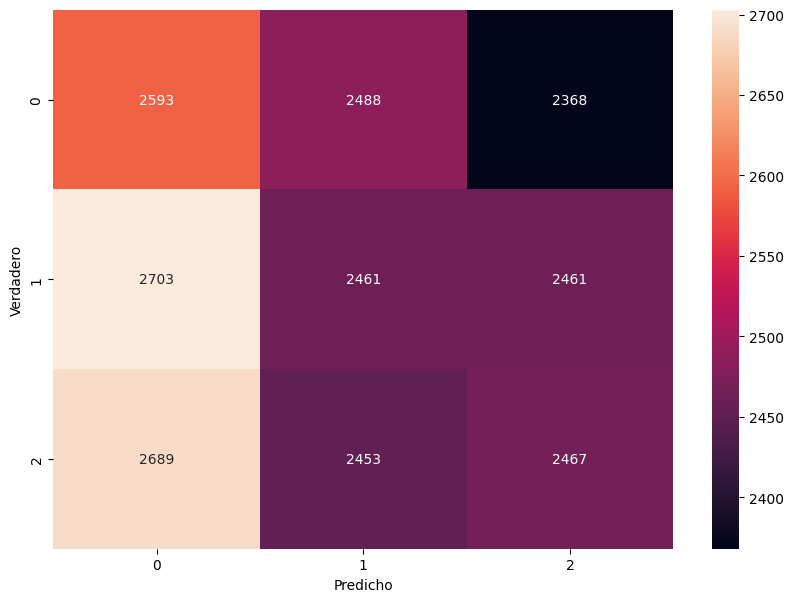

In [ ]:
# Asumimos que y_test son las etiquetas verdaderas e y_pred son las predicciones del modelo
# y_test = ...
# y_pred = ...

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Ahora puedes visualizar la matriz de confusión
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicho')
plt.ylabel('Verdadero')

El resultado Text(95.72222222222221, 0.5, 'Verdadero') es la salida de la función plt.ylabel('Verdadero') en matplotlib, que se utiliza para establecer el título del eje y en una gráfica. En este caso, el eje y se ha etiquetado como ‘Verdadero’.

La imagen que proporcionaste es una gráfica de una matriz de confusión, que es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación. La imagen es un mapa de calor de la matriz de confusión, con los valores predichos en el eje x y los valores verdaderos en el eje y. Los valores diagonales representan el número de predicciones correctas [(0,0), (1,1), (2,2)]), mientras que los valores fuera de la diagonal representan el número de predicciones incorrectas.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


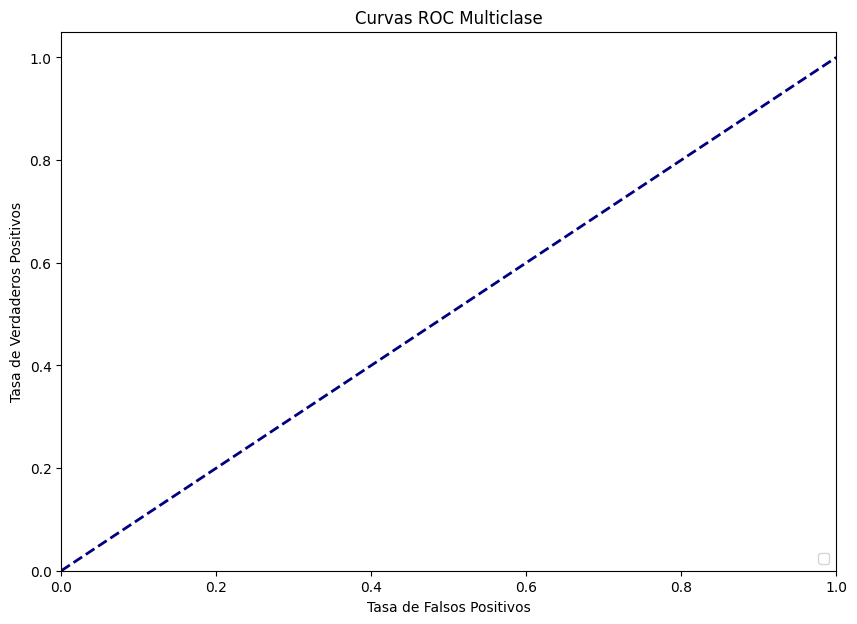

In [ ]:
def plot_multiclass_roc(model, X_test, y_test, n_classes):
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    probabilidades = model.predict_proba(X_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        if np.sum(y_test_bin[:, i]) > 0:
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probabilidades[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 7))
    lw = 2

    for i in range(n_classes):
        if i in roc_auc:
            plt.plot(fpr[i], tpr[i], lw=lw, label=f'Clase {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curvas ROC Multiclase')
    plt.legend(loc="lower right")
    plt.show()


# Llamar a la función para graficar la curva ROC multiclase
plot_multiclass_roc(model, X_test, y_test, n_classes)
